In [2]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import matplotlib.patches as patches
warnings.filterwarnings("ignore")
from mplsoccer.pitch import Pitch
plt.style.use('ggplot')
from PIL import Image
from highlight_text import htext
from matplotlib import cm
import matplotlib.patheffects as path_effects
from scipy.spatial import ConvexHull
from matplotlib.patches import Arc
%matplotlib inline
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
df = pd.read_csv("./partey_all1.csv")

In [5]:
mask = ((df['Player'] == 238940) & (df['Event'] == 'Pass' )) | ((df['Player'] == 238940) & (df['Event'] == 'Touch' ))
touch = df.loc[mask]
touch.head()

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype
3,Pass,0,3.0,238940.0,63,Successful,34.7,51.0,64.2,30.7,OpenPlay
33,Pass,1,17.0,238940.0,63,Successful,44.4,25.8,41.0,4.9,OpenPlay
83,Pass,3,26.0,238940.0,63,Successful,34.3,73.2,39.0,84.7,OpenPlay
109,Pass,4,28.0,238940.0,63,Successful,35.4,30.7,41.2,17.3,OpenPlay
114,Pass,4,51.0,238940.0,63,Successful,47.8,7.9,40.0,27.6,OpenPlay


In [6]:
cmap = ListedColormap(['#313332', '#5b433d', '#714237', '#874131', '#9c3e2b', '#b13925', '#c5311d', '#da2314', '#ef0107'])

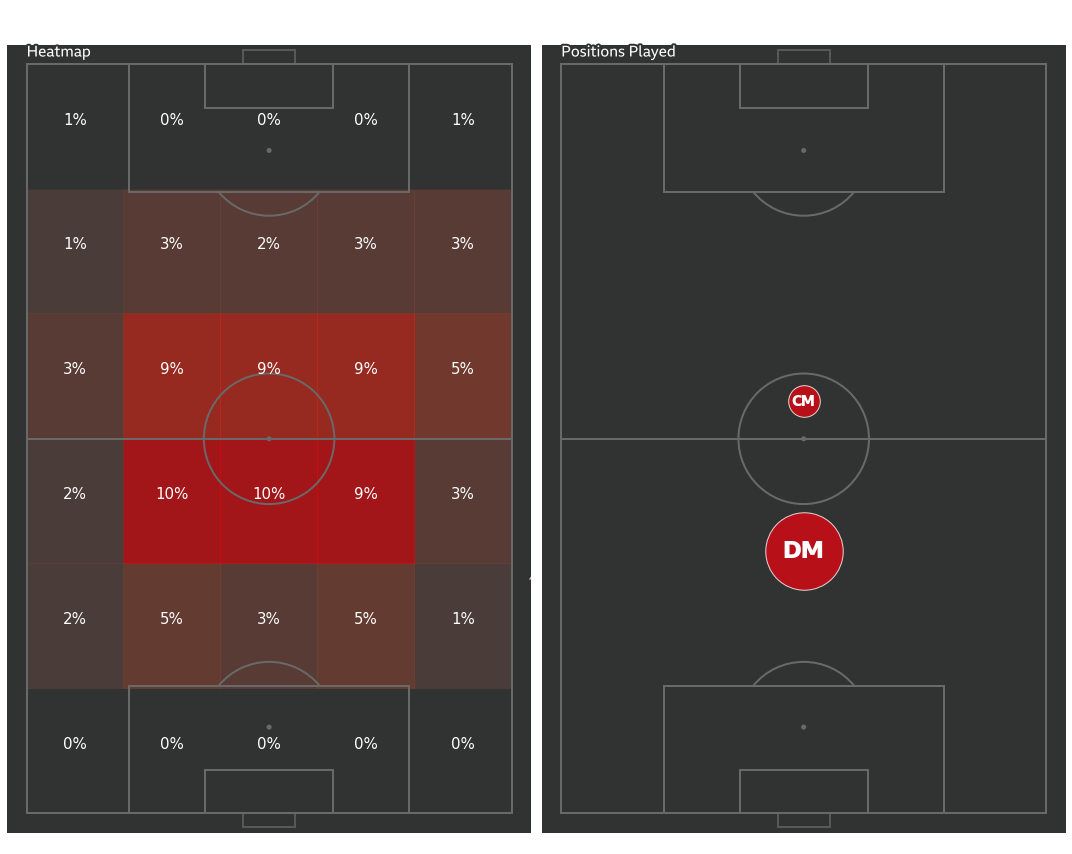

In [8]:
csfont = {'fontname':'BBC Reith Sans'}
hfont = {'fontname':'BBC Reith Sans'}

background = "#313332"
line = '#696969'
text_color ='white'
touches = '#f62681'
assisted = "#45c7e8"
goal = '#59c08a'
title_font = "BBC Reith Sans"
body_font = "BBC Reith Sans"

pitch = Pitch(pitch_type='opta', figsize=(15, 15), layout=(1,2), line_zorder=2, goal_type='box',
              pitch_color="#313332", line_color='#696969', orientation='vertical')
    
# draw
fig, ax = pitch.draw()
# heatmap specified by (nx, ny) for horizontal pitch
bins = [(6, 5)]
for i, bin in enumerate(bins):
    bin_statistic = pitch.bin_statistic(touch.X, touch.Y, statistic='count', bins=bin)
    # draw
    pitch.heatmap(bin_statistic, ax=ax[i], cmap=cmap, alpha=0.6)
    # replace raw counts with percentages and add percentage sign (note immutable named tuple so used _replace)
    bin_statistic['statistic'] = (pd.DataFrame((bin_statistic['statistic'] / bin_statistic['statistic'].sum()))
                                  .applymap(lambda x: '{:.0%}'.format(x))
                                  .values)
    pitch.label_heatmap(bin_statistic, color='white', fontsize=15, ax=ax[i], ha='center', va='bottom')
    


ax[1].scatter([50],[55],color='#DA0812', s=1000, zorder=12,alpha=0.8, ec='#FFFFFF',lw=1)
ax[1].scatter([50],[35],color='#DA0812', s=6000, zorder=12,alpha=0.8, ec='#FFFFFF',lw=1)


ax[1].text(50,55,"CM",color="white",fontsize=15, **csfont, fontweight='bold', HA='center', VA='center', zorder=13)
ax[1].text(50,35,"DM",color="white",fontsize=25, **csfont, fontweight='bold', HA='center', VA='center', zorder=13)



fig.text(0.027, 0.88, "Thomas Partey",fontsize=30, fontfamily=body_font, color='white', weight='bold',zorder=2, **csfont)
fig.text(0.234, 0.88, "Atlético Madrid | La Liga | Season 2019/2020",fontsize=18, fontfamily=body_font, color=text_color,zorder=2, **csfont)
n1 = fig.text(0.028, 0.854, "Heatmap",fontsize=15, fontfamily=body_font, color='white',zorder=2, **csfont)
n1.set_path_effects([path_effects.withStroke(linewidth=4,foreground=background)])
n2 = fig.text(0.523, 0.854, "Positions Played",fontsize=15, fontfamily=body_font, color='white',zorder=2, **csfont)
fig.text(0.523, 0.125, "Size of dot is representative of appearances made in each position",fontsize=12, fontfamily=body_font, fontstyle="italic",color='white',zorder=2, **csfont)
fig.text(0.027, 0.125, "Percentages are representative of passes made in particular area",fontsize=12, fontfamily=body_font, fontstyle="italic", color='white',zorder=2, **csfont)
n2.set_path_effects([path_effects.withStroke(linewidth=4,foreground=background)])
info_string = '@jonollington'
fig.text(0.87, 0.88, info_string, color='#ffffff', ha='left', va='bottom', fontsize=15, **csfont)

#arrow
arrow="Simple,tail_width=0.4,head_width=1.3,head_length=0.9"
ax2 = fig.add_axes([0.48,0.17,0.04,0.3])
ax2.axis("off")
ax2.annotate('', (0.48,0.7),(0.48,0), zorder=10, arrowprops=dict(arrowstyle=arrow,
            linewidth=0.2,  color='#ffffff',alpha=0.7))


plt.rcParams['axes.facecolor']=background
plt.rcParams['savefig.facecolor']=background
plt.savefig("positions",bbox_inches="tight",dpi=200);